In [85]:
#Inporataciones necesarioas
import pandas as pd 
import seaborn as sns
import numpy as np

In [86]:
#El mismo pandas tiene diferntes tipo de archivos para cargar el dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
#Se hace una descripcion para ver como esta conformado el dataset 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
#Los datos nulos (nada)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [90]:
#Los datos vacios (longitud = 0)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
#Se puede ver a aprte de a ver datos nulos tambien exiten datos vacios los cuales no son utiles para realizar el analisis.
#Por otra parte tambien se visualiza datos no estructuras denominado (Name y tiket) los cuales no nos utilices para el procesamiento
df = df.drop(columns=['Cabin','Ticket','Name'])
#Se muestra el nuevo dataset, con los datos estrucuturados 
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [92]:
#Siempre es bueno volvor a ejecutar todo de nuevo
#Mapeando alone
df.replace({'male': 0, 'female': 1}, inplace=True)
#Sobreescribe los datos en la misma columan
df['Sex'] = df['Sex'].map({1: 1, 0: 0})
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,S
887,888,1,1,1,19.0,0,0,30.0000,S
888,889,0,3,1,NaN,1,2,23.4500,S
889,890,1,1,0,26.0,0,0,30.0000,C


In [93]:
#Importaciones necesarioas para la implementacion de tenicas de inputacion 
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [94]:
#Como el campo Age me faltan datos se realza la tecnica de inputacino por medio de la media
im_mean=SimpleImputer(missing_values=np.nan, strategy='mean')
im_mean=im_mean.fit(df[['Age']])
#Se actualiza la columna con los datos correctamente distribuidos (media)
df['Age'] = im_mean.transform(df[['Age']])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [95]:
#Comparamos de nuevo si hay datos null
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [96]:
#Pendiente
##df['Embarked'].head(60)

In [97]:
#Para tranformar datos categoricos a numeros 
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder_X = LabelEncoder()
#Identificar variables categorias y ordenales 
#En ordinal si importa el orden 
#En categoria no importa el orden
#df['Sex'] = labelencoder_X.fit_transform(df['Embarked'])
#onehot_sex = OneHotEncoder(categorical_features=)

In [98]:
one_hot_df = pd.get_dummies(df, prefix=['Embarked'])
one_hot_df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.000000,1,0,7.2500,0,0,1
1,2,1,1,1,38.000000,1,0,71.2833,1,0,0
2,3,1,3,1,26.000000,0,0,7.9250,0,0,1
3,4,1,1,1,35.000000,1,0,53.1000,0,0,1
4,5,0,3,0,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,0,0,1
887,888,1,1,1,19.000000,0,0,30.0000,0,0,1
888,889,0,3,1,29.699118,1,2,23.4500,0,0,1
889,890,1,1,0,26.000000,0,0,30.0000,1,0,0


In [99]:
#df = pd.concat([df,one_hot_df],axis=1)

In [100]:
#df = df.drop(columns=['Embarked'])

In [101]:
one_hot_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


# MinMaxScaling

In [102]:
# dataset for the demo
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [103]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(one_hot_df.drop('Survived', axis=1),
                                                    one_hot_df['Survived'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((623, 10), (268, 10))

In [104]:
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:


# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [106]:
X_train.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,447.678973,2.287319,0.345104,29.873344,0.531300,0.393258,32.458273,0.173355,0.089888,0.733547
std,258.248011,0.840657,0.475784,13.019985,1.162891,0.832085,48.257658,0.378858,0.286251,0.442459
min,1.000000,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,217.500000,1.500000,0.000000,23.000000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000
50%,449.000000,3.000000,0.000000,29.699118,0.000000,0.000000,15.000000,0.000000,0.000000,1.000000
75%,670.500000,3.000000,1.000000,36.000000,1.000000,0.000000,31.387500,0.000000,0.000000,1.000000
max,890.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


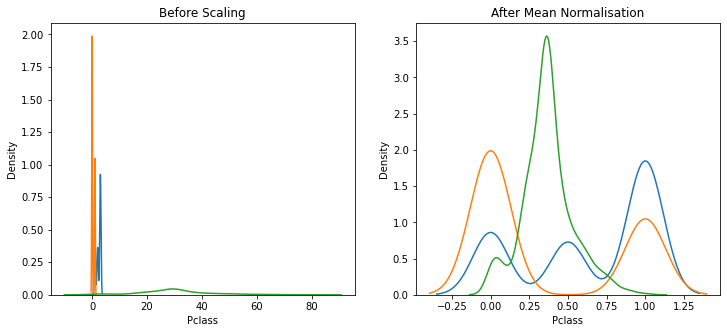

In [107]:
import matplotlib.pyplot as plt
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Pclass'], ax=ax1)
sns.kdeplot(X_train['Sex'], ax=ax1)
sns.kdeplot(X_train['Age'], ax=ax1)


# after scaling
ax2.set_title('After Mean Normalisation')
sns.kdeplot(X_train_scaled['Pclass'], ax=ax2)
sns.kdeplot(X_train_scaled['Sex'], ax=ax2)
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

# Decision Tree

In [108]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [109]:
X = one_hot_df[['PassengerId',	'Pclass',	'Sex',	'Age',	'SibSp',	'Parch',	'Fare',	'Embarked_C',	'Embarked_Q',	'Embarked_S']]

In [110]:
y = one_hot_df[['Survived']]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [112]:
X_test.shape, y_test.shape

((268, 10), (268, 1))

In [113]:

# create Decision Tree classifier object
clf = DecisionTreeClassifier()
# train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
# predict the response for test dataset
y_pred = clf.predict(X_test)

In [114]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7686567164179104
